In [3]:
import torch
from vast.DistributionModels import weibull
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
training_data = torch.rand(1,100)
testing_data = torch.arange(-5,10,0.01)[:,None]

In [20]:
torch.sort(training_data.flatten()).values[:tailsize]

tensor([0.0015, 0.0034, 0.0302, 0.0476, 0.0632, 0.0758, 0.0833, 0.1144, 0.1266,
        0.1524, 0.1557, 0.1631, 0.1758, 0.1973, 0.2008, 0.2027, 0.2068, 0.2069,
        0.2106, 0.2184])

In [8]:
tailsize = 20

### FitHigh v/s FitHighFlipped v/s FitLow

In [9]:
mr = weibull.weibull()
mr.FitHigh(training_data, tailsize)
FitHigh = mr.wscore(testing_data)

In [10]:
mr = weibull.weibull()
mr.FitHighFlipped(training_data, tailsize)
FitHighFlipped = mr.wscore(testing_data)

In [11]:
mr = weibull.weibull()
mr.FitLow(training_data, tailsize)
FitLow = mr.wscore(testing_data)

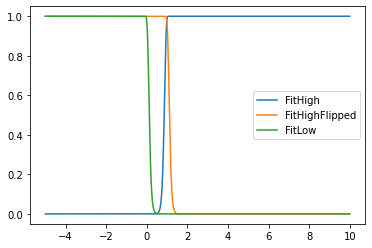

In [13]:
plt.plot(testing_data, FitHigh, label='FitHigh')
plt.plot(testing_data, FitHighFlipped, label='FitHighFlipped')
plt.plot(testing_data, FitLow, label='FitLow')
plt.legend()
plt.show()

### Effect of translate amount tensor on FitHigh

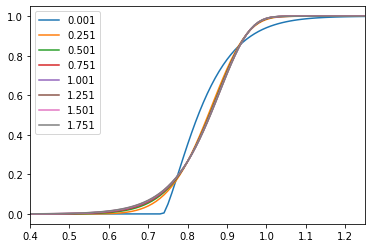

In [26]:
for i in torch.arange(0.001, 2, 0.25):
    mr = weibull.weibull(translateAmount=i)
    mr.FitHigh(training_data, tailsize)
    FitHigh = mr.wscore(testing_data)
    plt.plot(testing_data, FitHigh, label=f'{i:.3f}')
plt.xlim([0.4, 1.25])
plt.legend()
plt.show()